#  20 Nov 23 - Notes: Random Processes

Until now, all of our work has been with [deterministic systems](https://en.wikipedia.org/wiki/Deterministic_system). That is, we have a set of equations that allow us to describe the future of the system in space and time with certainty. Some differential equations are deterministic and all the ones that we have worked on so far are. Our analysis of ordinary differential equations, partial differential equations, and the wave equation have all been drawn from deterministic systems. We obtain equations or results that we can predict with (up to numerical) certainty. 

However, many processes in nature are not deterministic. These processes are stochastic, probabilistic, or [random](https://en.wikipedia.org/wiki/Randomness). We use these terms interchangeably, but ultimately the all describe a system with probabilistic states. These can be things like [the ideal gas in statistical mechanics](https://en.wikipedia.org/wiki/Ideal_gas) or [the hydrogen atom in quantum mechanics](https://en.wikipedia.org/wiki/Hydrogen_atom). But this work applies in contexts like the [stock market](https://bsj.berkeley.edu/how-scientists-are-using-statistical-physics-to-predict-the-stock-market/), [weather](https://en.wikipedia.org/wiki/Numerical_weather_prediction), [the spread of disease](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.104.014132), and even [information theory](https://en.wikipedia.org/wiki/Information_theory).

## Entropy

We will start with the concept of [entropy](https://en.wikipedia.org/wiki/Entropy), which serves as a major organizing idea for many statistical physics models and results. For example, conservation of energy tells us that the same amount of energy is needed for a ball to change its height (moving up or down), but the concept of increasing entropy indicates the ball won't spontaneously jump off the table. 

### Video

Later, we will develop a mathematical definition of entropy, when we introduce [counting statistics](https://en.wikipedia.org/wiki/Combinatorics). The result, developed by [Ludwig Boltzmann](https://en.wikipedia.org/wiki/Ludwig_Boltzmann), is quoted below:

$$S = k \ln(\Omega)$$

where $k$ is the [Boltzmann constant](https://en.wikipedia.org/wiki/Boltzmann_constant) and $\Omega$ is the ["multiplicity"](https://en.wikipedia.org/wiki/Multiplicity_(statistical_mechanics)) of the system. The video below from [Veritasium](https://www.youtube.com/channel/UCHnyfMqiRRG1u-2MsSQLbXA) provides a nice introduction to the concept of entropy.

[![Entropy](https://markdown-videos-api.jorgenkh.no/youtube/DxL2HoqLbyA?width=720&height=405)](https://inv.tux.pizza/watch?v=DxL2HoqLbyA)

- Non-Commercial Link: [https://inv.tux.pizza/watch?v=DxL2HoqLbyA](https://inv.tux.pizza/watch?v=DxL2HoqLbyA)
- Commercial Link: [https://youtube.com/watch?v=DxL2HoqLbyA](https://youtube.com/watch?v=DxL2HoqLbyA)

## Modeling Randomness

Underlying much of what we will study is the concept of randomness. [Randomness](https://en.wikipedia.org/wiki/Randomness) is a field of study across many disciplines. Modeling randomness is a fundamentally different way of approaching physics for several reasons:
1. we often have to construct models that describe the probability of a system being in a particular state,
2. we have to run those models for many iterations, and then,
3. we have to analyze the results of those models.

Because the concept of a [random variable](https://en.wikipedia.org/wiki/Random_variable) underlies everything we do, we will start with an exploration of probability and counting. In physics, those random variables correspond to the state of a system and the probability of that system being in that state. The probabilities of occupying certain states tends to be a function of energy as we will see.

To begin, we will start with the concepts of [microstates and macrostates](https://en.wikipedia.org/wiki/Microstate_(statistical_mechanics)). A microstate is a particular state of a system. For example, if we have ten coins that are different colors (distinguishable) and they have a certain pattern of heads and tails - that is a microstate. A macrostate is a collection of those microstates that are indistinguishable. So, now remove the color of the coins when counting (e.g., 4 heads and 6 tails) that is a macrostate. But it is important to note that that a macrostate is a collection of microstates, but that might be one microstate, or many.

* Microstate - tracks individual constituent states as if they were unique
* Macrostate - a group of microstates that share something 

### Video

In this needs to be a bit more concrete, here's a short example with 3 coins, which we will simulate for N coins below.

[![Microstates and Macrostates](https://markdown-videos-api.jorgenkh.no/youtube/9rYvq6kbUUA?width=720&height=405)](https://inv.tux.pizza/watch?v=9rYvq6kbUUA)

- Non-Commercial Link: [https://inv.tux.pizza/watch?v=9rYvq6kbUUA](https://inv.tux.pizza/watch?v=9rYvq6kbUUA)
- Commercial Link: [https://youtube.com/watch?v=9rYvq6kbUUA](https://youtube.com/watch?v=9rYvq6kbUUA)



### Coin Flipping Model

To demonstrate the concept of microstates and macrostates, we will start with a simple model of flipping coins. The coins are distinguishable, so we can track them individually. We note those different coins by the order of the array. Below, we have written a couple functions that flip a coin `flip_coin()` and simulate flipping several coins and for a number of times. We import a few relevant libraries including `random` and `seaborn` for plotting. We will use `seaborn` for plotting because it has a nice `histplot` function that we will use to plot the results of our coin flips.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def flip_coin(prob=0.5):
    """Simulate a single coin flip.
    default a fair coin."""
    return 1 if random.random() < prob else 0

def flip_coins(coins, prob=0.5):
    """Simulate a series of coin flips.
    default a fair coin."""
    return [flip_coin(prob) for _ in range(coins)]

We can see by calling `flip_coins(N)`, we get a array of `N` coins that are either heads (1) or tails (0).

In [3]:
flip_coins(10)

[1, 1, 1, 1, 0, 0, 1, 0, 1, 1]

### Microstates

We can run a short simulation of flipping 10 coins 3 times to see the different potential microstates. We show the code to run the simulation, but have hidden the visualization code for now. It is not important to understand the visualization code, but it is important to understand the visualization. The purple squares are heads (1) and the yellow squares are tails (0). The rows are the different coins and the columns are the different flips. 


In [4]:
num_coins = 10
num_trials = 3

# Simulate flipping num_coins coins num_trials times.
# Each row is a trial.
# Each column is a coin.
flips = np.array([flip_coins(num_coins) for _ in range(num_trials)])
print(flips)

[[0 1 1 0 0 1 1 1 0 1]
 [1 1 1 0 1 0 1 0 0 1]
 [1 0 1 0 1 1 0 0 1 1]]


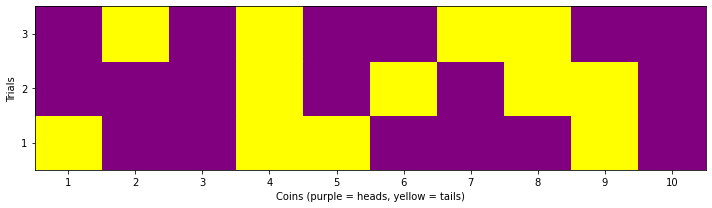

In [5]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, num_trials))

# Iterate over trials and coins
for trial in range(num_trials):
    for coin in range(num_coins):
        # Get the result of the coin flip
        flip = flips[trial, coin]
        
        # Determine the color based on the result
        color = 'purple' if flip == 1 else 'yellow'
        
        # Add a patch to the plot
        ax.add_patch(plt.Rectangle((coin, trial), 1, 1, color=color))

# Set axis limits and labels
ax.set_xlim(0, num_coins)
ax.set_ylim(0, num_trials)
ax.set_yticks(np.arange(num_trials) + 0.5, np.arange(num_trials) + 1)
ax.set_xticks(np.arange(num_coins) + 0.5, np.arange(num_coins) + 1)
ax.set_ylabel('Trials')
ax.set_xlabel('Coins (purple = heads, yellow = tails)')

# Show the plot
plt.tight_layout()

# Macrostates

To illustrate the macrostates, we will run simulations for 10 coins for various numbers of flips. Because the number of heads (H) and the number of tails (T) are equal to 10:

$$H+T = 10$$

It's sufficient to use the number of heads (H) as the macrostate. We can use this to develop a distribution of the macrostates and thus the probabilities for different macrostates. We will use the `histplot` function from `seaborn` to plot the distribution of the macrostates. We wrote a couple functions to simulate the coin flips and plot the results. 

In [6]:
def simulate_trials(trials, coins):
    # Simulate flipping coins for each trial
    heads = [flip_coins(coins).count(1) for _ in range(trials)]
    return heads

def plot_histogram(heads, trials, index, coins):
    # Plot histogram
    sns.histplot(heads, 
                 bins=np.arange(coins+2)-0.5, 
                 kde=False, stat="density", 
                 label=f'{trials} Trials', 
                 element="step", 
                 color=sns.color_palette()[index - 1],
                 alpha=0.7)
    plt.xlabel('Number of Heads')
    plt.ylabel('Frequency')
    plt.legend()

We can see that as we add more trials, the distribution gets more filled out, and is becoming more symmetric. This distribution looks Gaussian after a large number of trials. This is the case for a large number of trials because each event is identical and independent. This is the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) in action.

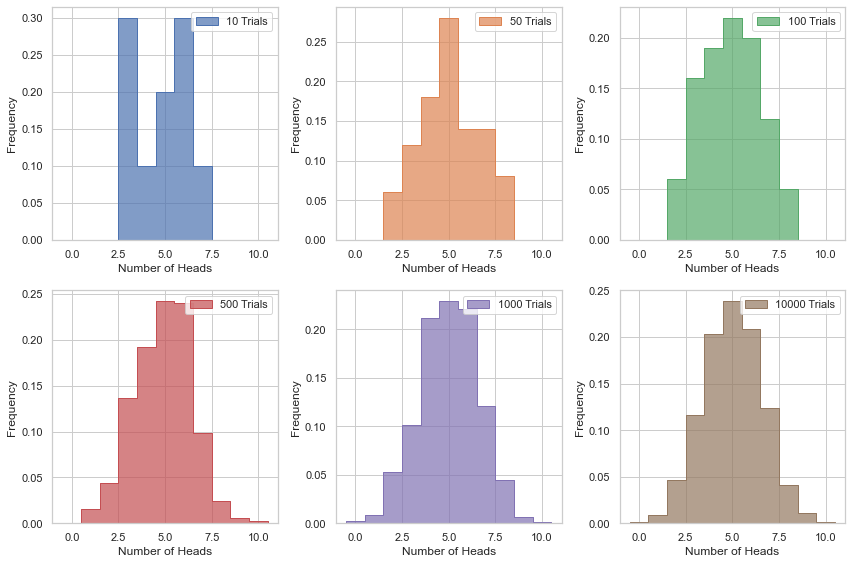

In [7]:
# Set the number of trials and flips
trial_sets = [10, 50, 100, 500, 1000, 10000]
coins = 10 

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Set the seaborn style
sns.set(style="whitegrid")

for trials in trial_sets:
    
    index = trial_sets.index(trials)+1 # Set the subplot index
    n = len(trial_sets) # Set the number of subplots
    rows = int(np.ceil(n/2)) # Set the number of rows
    
    plt.subplot(2, rows, index)
    
    heads = simulate_trials(trials, coins)
    plot_histogram(heads, trials, index, coins)

plt.tight_layout()

This is useful, but the important part of this kind of modeling is to determine the probablities of the macrostates. We can compute those by simply determining the number of times a particular macrostate occurs and dividing by the total number of trials. We wrote two functions to compute and plot these.

In [8]:
def calculate_probabilities(trials, coins):
    # Simulate flipping coins for each trial
    heads = [flip_coins(coins).count(1) for _ in range(trials)]
    
    # Calculate empirical probabilities
    values, counts = np.unique(heads, return_counts=True)
    probabilities = counts / trials
    
    return values, probabilities

def plot_probabilities(ax, values, probabilities, trials, index):
    # Define marker types
    markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
    
    # Plot empirical probabilities
    ax.scatter(values, probabilities, 
               label=f'{trials} Trials', 
               color=sns.color_palette()[index - 1],
               marker=markers[index % len(markers)], # Use different marker for each set of trials
               s=100) # Set marker size

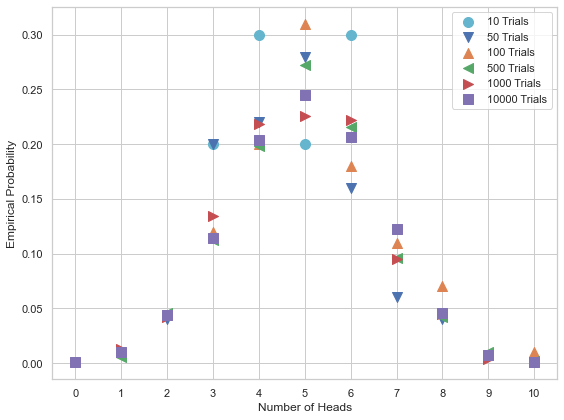

In [9]:
plt.figure(figsize=(8, 6))

# Set the seaborn style
sns.set(style="whitegrid")

# Create a single subplot
ax = plt.subplot(1, 1, 1)

for trials in trial_sets:
    
    index = trial_sets.index(trials) # Set the subplot index
    
    values, probabilities = calculate_probabilities(trials, coins)
    plot_probabilities(ax, values, probabilities, trials, index)

# Set x-ticks to be centered on the markers
ax.set_xticks(np.arange(0, coins+1))

plt.xlabel('Number of Heads')
plt.ylabel('Empirical Probability')
plt.legend()

plt.tight_layout()

It's quite easy to see form here that more trials leads to more stable and concrete probabilities for each state.

## Additional Resources

### Videos

Here's an interesting application of the models of Poisson process and Queueing

[![Queuing theory and Poisson process](https://markdown-videos-api.jorgenkh.no/youtube/rBIQmwaoZfs?width=720&height=405)](https://inv.tux.pizza/watch?v=rBIQmwaoZfs)

- Non-Commercial Link: [https://inv.tux.pizza/watch?v=rBIQmwaoZfs](https://inv.tux.pizza/watch?v=rBIQmwaoZfs)
- Commercial Link: [https://youtube.com/watch?v=rBIQmwaoZfs](https://youtube.com/watch?v=rBIQmwaoZfs)

